# AoC 2020 day 24
Part 1 sounds easy. Represent the hex grid as a normal square grid, but with axes at 60 degrees to each other. That means steps to E/W are represented by moving in $x$ by $\pm 1$, steps to ne and sw mean $y \pm 1$. Step to nw is then $-1$ in $x$ $+1$ in $y$, and step to se is $+1$ in $x$ and $-1$ in $y$. The floor may be then represented as a dictionary with coordinates as keys and colour as value. 

In [1]:
function sol1(file)
    floor = Dict()
    dir = Dict("w" => (-1,0), "e"=>(1,0), "ne"=>(0,1), "sw"=>(0,-1), "nw"=>(-1,1), "se"=>(1,-1) )
    for line in eachline(file)
        loc = (0,0)   # starting location
        ptr = 1       # pointer to current character in string
        while ptr ≤ length(line)
            cmd = string(line[ptr])
            ptr += 1
            if cmd in ("n","s")
                cmd = cmd*string(line[ptr])
                ptr += 1
            end
            loc = loc .+ dir[cmd]
        end
        if !haskey(floor,loc)
            floor[loc] = 1
        else
            floor[loc] = 1-floor[loc]
        end
    end
    res = sum(values(floor))
    res,floor
end
rt,floort = sol1("test.txt")
rt

10

That was easy. Test OK, lights green, go.

In [2]:
ri,floori = sol1("input.txt")
ri

512

## Part 2
The author seems to have a kind of obsession with game of life this year... "Line of sight life" on [day 11](https://adventofcode.com/2020/day/11), "3-d and 4-d life" on [day 17](https://adventofcode.com/2020/day/17), and now "game of life of a hex grid".

Use the same strategy as on day 17, i.e. represent the current state as a set of black tile coordinates (in the non-rectangular coordinate system introduced in part 1). Write a function that counts black neghbours of a given tile. Then write a function that does the transformation of the current state into next state. 

First extract dictionary keys of black tiles and collect them into a set.

In [3]:
flt = Set(keys(filter(x->x[2]==1,floort)))

Set{Any} with 10 elements:
  (0, 0)
  (-1, -2)
  (0, -3)
  (2, 0)
  (-2, 1)
  (-1, 1)
  (2, -2)
  (-2, 0)
  (-1, -1)
  (0, 3)

In [4]:
function transf(floor)
    nt = [(1,0),(-1,0),(0,1),(0,-1),(1,-1),(-1,1)]  # neighbour tiles as coordinate deltas
    cntnbr(loc) = count(x->(loc.+x) in floor, nt)   # one-liner function to count black neighbours (it's not racist!)
    nextf = Set()    # next state being built
    for tile in floor
        # First check if the tile survives
        if cntnbr(tile) in [1,2]
            push!(nextf,tile)
        end
        # Now check if any neghbout tile appears
        for n in nt
            ctile = tile .+ n
            if ctile in floor || ctile in nextf
                continue
            else
                if cntnbr(ctile)==2
                    push!(nextf,ctile)
                end
            end
        end
    end
    nextf
end
transf(flt)

Set{Any} with 15 elements:
  (0, 0)
  (0, -1)
  (-2, 1)
  (-2, 0)
  (2, -1)
  (-1, -1)
  (-1, -3)
  (1, 0)
  (-3, 1)
  (0, 1)
  (-2, 2)
  (-1, -2)
  (0, -3)
  (1, -1)
  (-1, 1)

One-step test seems OK, the following function implements a solution, i.e. it runs `n` steps and returns the number of black tiles in the final state.

In [5]:
function sol2(floor,n)
    for i in 1:n
        floor = transf(floor)
    end
    length(floor)
end
sol2(flt,100)

2208

Test OK, time for the production run.

In [6]:
fli = Set(keys(filter(x->x[2]==1,floori)))
sol2(fli,100)

4120

## More
Again an easy problem for today. Somehow the whole competition seems to me much easier, than the last two years. To learn something new today, despite largely copying the solution from a week ago, try to plot the configuration. I'm told Julia has excellent plotting facilities, but we had no opportunity to play with them yet. 

Start with transformation of our "skewed" coordinates into standard rectangular ones. To do it apply
\begin{equation} x^\prime = x + \frac{y}{2} \\ y^\prime = \frac{\sqrt{3}}{2} y \end{equation}

In [7]:
rc(x,y) = ((x+y/2.), y*sqrt(3)/2.)
rc(0,2)

(1.0, 1.7320508075688772)

In [8]:
tcoords = [rc(x,y) for (x,y) in flt]

10-element Array{Tuple{Float64,Float64},1}:
 (0.0, 0.0)
 (-2.0, -1.7320508075688772)
 (-1.5, -2.598076211353316)
 (2.0, 0.0)
 (-1.5, 0.8660254037844386)
 (-0.5, 0.8660254037844386)
 (1.0, -1.7320508075688772)
 (-2.0, 0.0)
 (-1.5, -0.8660254037844386)
 (1.5, 2.598076211353316)

In [9]:
using Plots


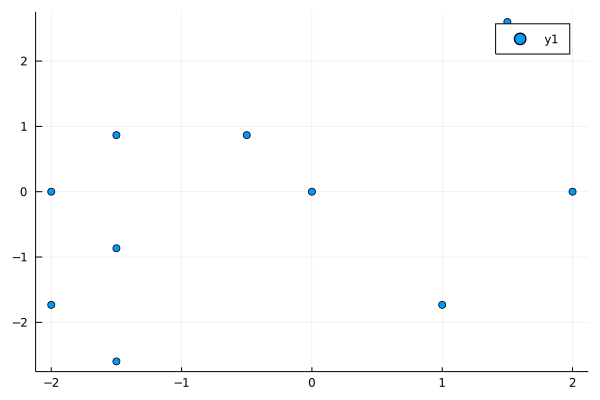

In [10]:
scatter(tcoords)

It took a while to load and precompile all required packages, but it works. Now learn how to:
* delete axes
* delete legend
* change symbol
* change symbol size

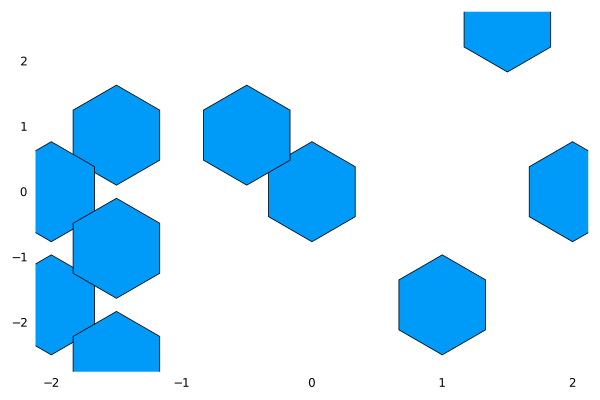

In [11]:
scatter(tcoords,showaxis=false,grid=false,label="",markershape=:hexagon,markersize=50)

Great, now make plot area square, extend, and get rid of the numbers. And make the hexagons black, they are black in the description of the puzzle

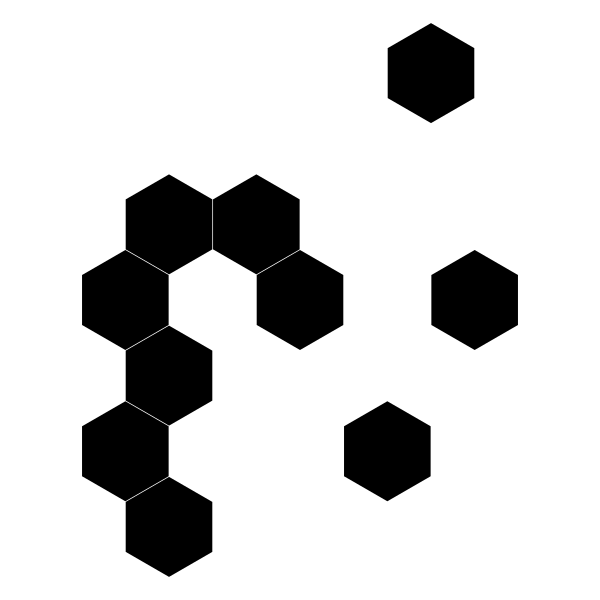

In [12]:
scatter(tcoords,showaxis=false,grid=false,label="",markershape=:hexagon,markersize=50, markercolor=:black, size=(600,600),ticks=false, lims=(-3.3,3.3))

Wow, am I not great? So, look at my initial pattern. Need to look at the limits first.

In [13]:
icoords = [rc(x,y) for (x,y) in fli]
xc = [x[1] for x in icoords]
yc = [x[2] for x in icoords]
println(maximum(xc)," ",minimum(xc)," ",maximum(yc)," ",minimum(yc))

17.0 -17.0 14.722431864335457 -14.722431864335457


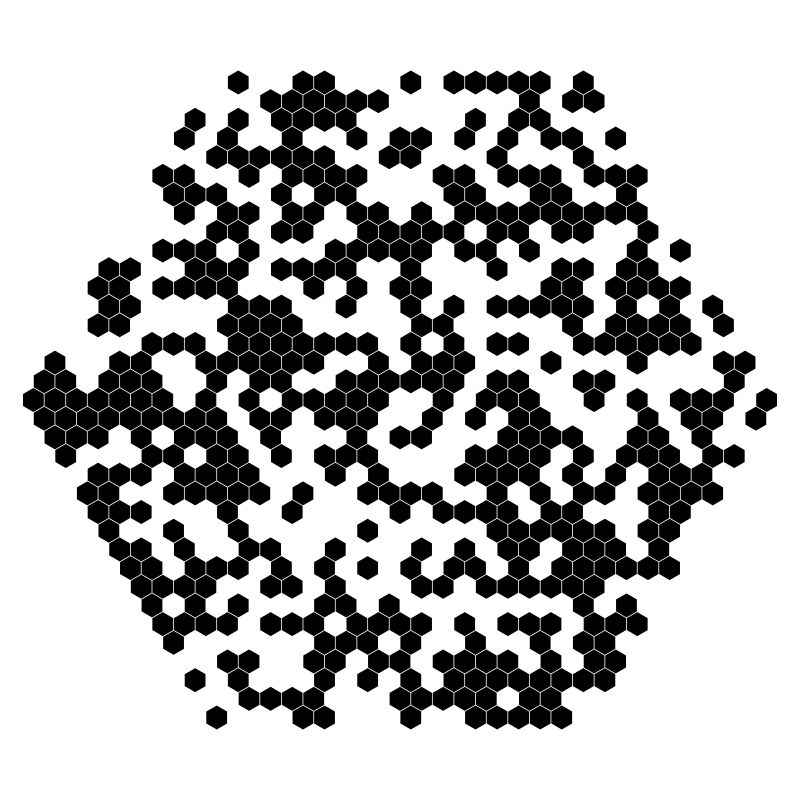

In [14]:
scatter(icoords,showaxis=false,grid=false,label="",markershape=:hexagon,markersize=12, markercolor=:black, size=(800,800),ticks=false, lims=(-18,18))

Somehow I hoped, that maybe there would be something hidden in the initial pattern.

Anyhow, plotting works, I could maybe try to make an animation of the game, but maybe not today, so much to do at home.